## CODE TO PERFORM TEMPLATE MATCHING (FIND A TRUCK!)

# LOAD/DISPLAY IMAGE

In [9]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
%matplotlib inline

image_color = cv2.imread('Find_Truck_color.jpg')
# image_color = mpimg.imread('Truck_detection.jpg') # import image as RGB instead of BGR 


cv2.imshow('Find Truck Template Matching', image_color)
cv2.waitKey()
cv2.destroyAllWindows()


In [10]:
height, width = image_color.shape[:2]

In [11]:
height

628

In [12]:
width

1194

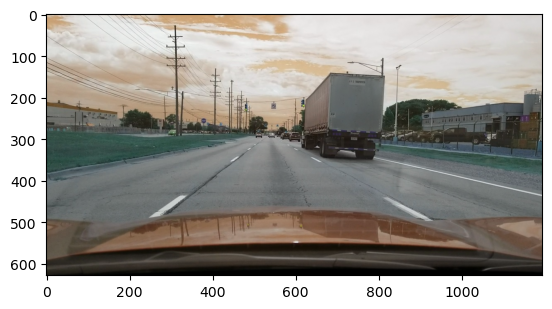

In [13]:
plt.imshow(image_color)


## CONVERT TO GREYSCALE

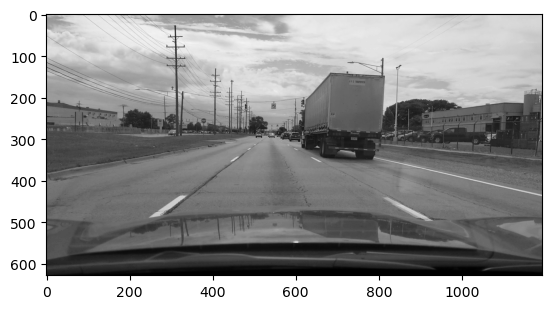

In [14]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')


In [15]:
image_gray.shape

(628, 1194)

In [16]:
# Save the image in greyscale
# cv2.imwrite("Truck_grey.jpg", image_gray)


In [17]:
# Load Template image
# This is used to find the truck in the original image
template = cv2.imread('Truck_template.jpg',0)

cv2.imshow('Truck Template', template)
cv2.waitKey()
cv2.destroyAllWindows()


In [18]:
template.shape

(209, 200)

In [19]:
w, h = template.shape[::-1]
w

200

In [20]:
h

209

# PERFORM TEMPLATE MATCHING

In [21]:
# Perform template matching!
result = cv2.matchTemplate(image_gray, template, cv2.TM_CCOEFF_NORMED)
result.shape
 

(420, 995)

In [28]:
# Notice that there is a white point at the top left corner of truck
# This indicates that the template has been found

cv2.imshow('Matching Results', result)
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
# Find the indices of the object to be find 
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

In [30]:
# The top left point
max_loc

(616, 142)

In [25]:
# Draw a box around the object (if found)
# w, h = width and height of template
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image_color, top_left, bottom_right, (0,0,255), 5)


array([[[204, 185, 170],
        [206, 187, 172],
        [209, 190, 175],
        ...,
        [214, 210, 209],
        [214, 210, 209],
        [214, 210, 209]],

       [[215, 196, 181],
        [216, 198, 181],
        [218, 199, 184],
        ...,
        [214, 210, 209],
        [215, 211, 210],
        [215, 211, 210]],

       [[219, 199, 182],
        [219, 199, 181],
        [218, 200, 183],
        ...,
        [215, 211, 210],
        [214, 212, 211],
        [214, 212, 211]],

       ...,

       [[ 34,  31,  26],
        [ 34,  31,  26],
        [ 34,  31,  26],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 33,  30,  25],
        [ 33,  30,  25],
        [ 33,  30,  25],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 32,  29,  24],
        [ 32,  29,  24],
        [ 31,  28,  23],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [26]:
cv2.imshow('Truck Located!', image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()